In [1]:
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
%%bash
ls

Authorization.py
Data_Analysis.ipynb
Flask
README.md
__pycache__
edm_main.py
lofi_main.py
package.json
spotify_EDMvsLoFi_new.sqbpro
spotify_EDMvsLoFi_new.sqlite
track_extraction.py


In [3]:
#Create a db connection
con = sqlite3.connect('spotify_EDMvsLoFi_new.sqlite')
cursor = con.cursor()

In [4]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('EDM_music',), ('LOFI_music',)]


In [5]:
#Check columns of the table
def table_columns(db, table_name):
    curs = db.cursor()
    sql = "select * from %s where 1=0;" % table_name
    curs.execute(sql)
    return [d[0] for d in curs.description]

In [6]:
#checking columns in each table
table_columns(con, 'lofi_music')

['track_name',
 'artist_name',
 'album',
 'artist_genres',
 'release_date',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms']

In [7]:
#checking columns in each table
table_columns(con, 'edm_music')

['track_name',
 'artist_name',
 'album',
 'artist_genres',
 'release_date',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms']

In [8]:
#Reading columns into a pandas Dataframe
df_lofi = pd.read_sql_query("SELECT * FROM lofi_music", con)
df_lofi.head()

,track_name,artist_name,album,artist_genres,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Tell Me Why I'm Waiting,Timmies,Passion & Confusion,lo-fi chill,2017-09-21,0.671,0.2750,6,-11.185,0,0.0560,0.7960,0.000339,0.0657,0.1590,124.007,123891
1,Eternal Youth,RŮDE,Eternal Youth,japanese chillhop,2017-08-07,0.655,0.4870,6,-7.988,1,0.0330,0.0347,0.897000,0.2710,0.0454,139.914,205766
2,Call me,90sFlav,Collection,lo-fi beats,2018-02-09,0.748,0.2650,8,-12.074,0,0.2290,0.9520,0.917000,0.0866,0.1400,77.009,126250
3,I'll Keep You Safe,sagun,I'll Keep You Safe,lo-fi beats,2017-10-06,0.752,0.0625,7,-24.694,1,0.0557,0.9450,0.819000,0.1780,0.4620,114.982,185876
4,i'm closing my eyes,potsu,i'm closing my eyes,japanese chillhop,2017-05-17,0.895,0.1090,0,-13.853,0,0.0996,0.5340,0.549000,0.1060,0.5460,134.067,118302


In [9]:
#Evaluating only the audio features
df_lofi_eval = df_lofi[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
                    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
df_lofi_eval.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.671,0.2750,6,-11.185,0,0.0560,0.7960,0.000339,0.0657,0.1590,124.007,123891
1,0.655,0.4870,6,-7.988,1,0.0330,0.0347,0.897000,0.2710,0.0454,139.914,205766
2,0.748,0.2650,8,-12.074,0,0.2290,0.9520,0.917000,0.0866,0.1400,77.009,126250
3,0.752,0.0625,7,-24.694,1,0.0557,0.9450,0.819000,0.1780,0.4620,114.982,185876
4,0.895,0.1090,0,-13.853,0,0.0996,0.5340,0.549000,0.1060,0.5460,134.067,118302


In [10]:
df_lofi_eval.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000
mean,0.668372,0.360880,5.454715,-12.244277,0.455649,0.100879,0.603096,0.757459,0.153166,0.401057,107.969798,138026.821662
std,0.117164,0.156298,3.556691,3.812841,0.498262,0.095421,0.286941,0.251224,0.106389,0.224550,35.393970,30914.573767
min,0.275000,0.019000,0.000000,-28.071000,0.000000,0.025000,0.000859,0.000000,0.040900,0.031300,30.993000,63250.000000
25%,0.599500,0.240000,2.000000,-14.385500,0.000000,0.042550,0.386500,0.748000,0.102500,0.220000,80.049500,116857.500000
50%,0.684000,0.354000,6.000000,-11.749000,0.000000,0.062500,0.682000,0.860000,0.113000,0.364000,89.047000,135574.000000
75%,0.748000,0.463000,9.000000,-9.562500,1.000000,0.115500,0.844500,0.909000,0.151000,0.548000,140.029000,155166.500000
max,0.947000,0.959000,11.000000,-2.624000,1.000000,0.741000,0.992000,0.983000,0.882000,0.982000,221.764000,339082.000000


In [11]:
df_lofi_eval.corr()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
danceability,1.000000,0.101812,0.002442,0.231254,0.023624,0.179214,-0.152172,0.008272,-0.059331,0.349634,-0.018468,-0.139724
energy,0.101812,1.000000,0.016567,0.660560,-0.056611,0.008414,-0.407194,-0.107686,0.112444,0.259610,0.037100,0.090067
key,0.002442,0.016567,1.000000,0.039943,-0.133372,0.044961,0.005617,-0.005575,0.018548,0.075281,-0.017560,-0.023479
loudness,0.231254,0.660560,0.039943,1.000000,-0.071463,0.072234,-0.356310,-0.083247,0.063549,0.229735,0.007064,0.025841
mode,0.023624,-0.056611,-0.133372,-0.071463,1.000000,0.044832,0.014487,-0.009488,0.008547,-0.044499,-0.029993,-0.005249
speechiness,0.179214,0.008414,0.044961,0.072234,0.044832,1.000000,-0.015891,-0.198562,0.002381,0.222065,0.081601,-0.139439
acousticness,-0.152172,-0.407194,0.005617,-0.356310,0.014487,-0.015891,1.000000,0.123102,-0.079964,-0.208699,0.002671,-0.072400
instrumentalness,0.008272,-0.107686,-0.005575,-0.083247,-0.009488,-0.198562,0.123102,1.000000,-0.181595,-0.021565,0.062009,-0.059619
liveness,-0.059331,0.112444,0.018548,0.063549,0.008547,0.002381,-0.079964,-0.181595,1.000000,0.028269,-0.026737,0.086835
valence,0.349634,0.259610,0.075281,0.229735,-0.044499,0.222065,-0.208699,-0.021565,0.028269,1.000000,0.090640,-0.143346


/var/folders/b8/qw7xf4r16w383xrhw3980l4w0000gp/T/ipykernel_25896/2465318611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lofi_eval.drop(columns=['mode','duration_ms','key'], inplace=True)


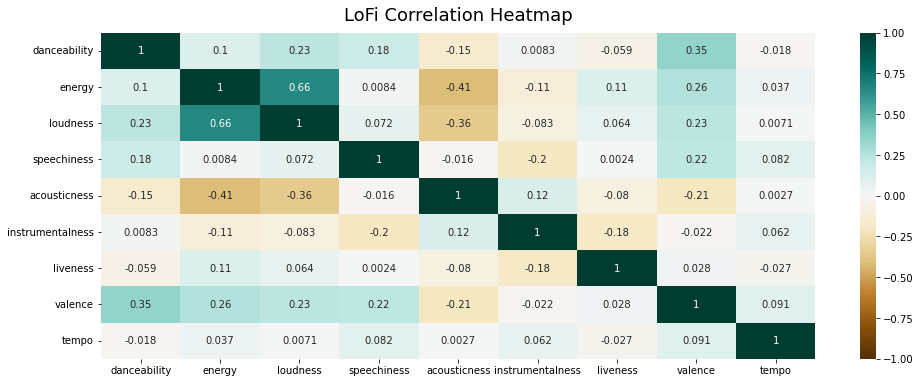

In [19]:
plt.figure(figsize=(16, 6))
df_lofi_eval.drop(columns=['mode','duration_ms','key'], inplace=True)
heatmap = sns.heatmap(df_lofi_eval.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('LoFi Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [13]:
#Reading columns into a pandas Dataframe
df_edm = pd.read_sql_query("SELECT * FROM edm_music", con)
df_edm.head()

,track_name,artist_name,album,artist_genres,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Ten Feet Tall,Afrojack,Forget The World (Deluxe),big room,2014-01-01,0.523,0.861,0,-3.447,1,0.0644,0.033600,0.0000,0.1440,0.346,127.049,229149
1,Feel Good (feat. Daya),Gryffin,Feel Good (feat. Daya),dance pop,2017-03-03,0.625,0.707,2,-4.761,1,0.0337,0.220000,0.0000,0.2130,0.479,138.064,248156
2,Narco,Blasterjaxx,Narco,big room,2017-11-13,0.764,0.943,8,-4.047,1,0.0711,0.007840,0.1040,0.0699,0.207,129.961,208635
3,Secrets,Tiësto,"Club Life, Vol. 4 - New York City",big room,2015-05-18,0.648,0.812,11,-7.585,0,0.0414,0.000329,0.0369,0.0857,0.122,128.178,250947
4,Forbidden Voices,Martin Garrix,Forbidden Voices,dance pop,2015-02-23,0.534,0.711,10,-5.927,0,0.0368,0.050000,0.0031,0.1350,0.300,128.102,230635


In [14]:
#Evaluating only the audio features
df_edm_eval = df_edm[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
                    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
df_edm_eval.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.523,0.861,0,-3.447,1,0.0644,0.033600,0.0000,0.1440,0.346,127.049,229149
1,0.625,0.707,2,-4.761,1,0.0337,0.220000,0.0000,0.2130,0.479,138.064,248156
2,0.764,0.943,8,-4.047,1,0.0711,0.007840,0.1040,0.0699,0.207,129.961,208635
3,0.648,0.812,11,-7.585,0,0.0414,0.000329,0.0369,0.0857,0.122,128.178,250947
4,0.534,0.711,10,-5.927,0,0.0368,0.050000,0.0031,0.1350,0.300,128.102,230635


In [15]:
df_edm_eval.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,0.632705,0.780805,5.657718,-5.185738,0.469799,0.060552,0.094540,0.072246,0.189312,0.398066,125.254530,210069.859060
std,0.110082,0.114487,3.576900,1.714455,0.500770,0.039455,0.136367,0.197850,0.148413,0.199270,12.435448,45310.754059
min,0.209000,0.463000,0.000000,-10.905000,0.000000,0.026200,0.000132,0.000000,0.036000,0.034800,88.519000,132598.000000
25%,0.579000,0.717000,2.000000,-6.102000,0.000000,0.038300,0.012800,0.000000,0.092300,0.227000,121.999000,183726.000000
50%,0.636000,0.792000,6.000000,-5.076000,0.000000,0.047600,0.038100,0.000034,0.135000,0.383000,125.975000,206413.000000
75%,0.705000,0.863000,9.000000,-4.047000,1.000000,0.069300,0.117000,0.005980,0.249000,0.505000,128.029000,229149.000000
max,0.887000,0.989000,11.000000,-0.959000,1.000000,0.256000,0.827000,0.921000,0.938000,0.919000,179.642000,487359.000000


In [16]:
df_edm_eval.corr()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
danceability,1.000000,-0.082635,0.060831,-0.106362,-0.147124,0.106137,0.159992,0.078810,-0.015210,0.392339,-0.423738,-0.305883
energy,-0.082635,1.000000,-0.004454,0.646521,-0.008058,0.117396,-0.390474,0.130996,0.209324,0.027957,0.135922,-0.161733
key,0.060831,-0.004454,1.000000,-0.092196,-0.162356,0.163600,0.018467,0.049256,0.119517,0.050647,-0.022809,-0.078137
loudness,-0.106362,0.646521,-0.092196,1.000000,0.157397,0.010753,-0.220358,-0.122085,-0.022640,0.131752,0.156906,-0.181937
mode,-0.147124,-0.008058,-0.162356,0.157397,1.000000,-0.095658,-0.041062,-0.016989,-0.248243,-0.010316,0.071501,0.088332
speechiness,0.106137,0.117396,0.163600,0.010753,-0.095658,1.000000,0.135589,-0.042020,0.027182,-0.031183,0.119379,-0.003299
acousticness,0.159992,-0.390474,0.018467,-0.220358,-0.041062,0.135589,1.000000,-0.144877,-0.158569,0.026445,-0.189353,0.113598
instrumentalness,0.078810,0.130996,0.049256,-0.122085,-0.016989,-0.042020,-0.144877,1.000000,0.091194,-0.122114,0.062799,0.094824
liveness,-0.015210,0.209324,0.119517,-0.022640,-0.248243,0.027182,-0.158569,0.091194,1.000000,-0.011157,-0.032212,-0.004833
valence,0.392339,0.027957,0.050647,0.131752,-0.010316,-0.031183,0.026445,-0.122114,-0.011157,1.000000,-0.214055,-0.177726


/var/folders/b8/qw7xf4r16w383xrhw3980l4w0000gp/T/ipykernel_25896/3900241395.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_edm_eval.drop(columns=['mode','duration_ms','key'], inplace=True)


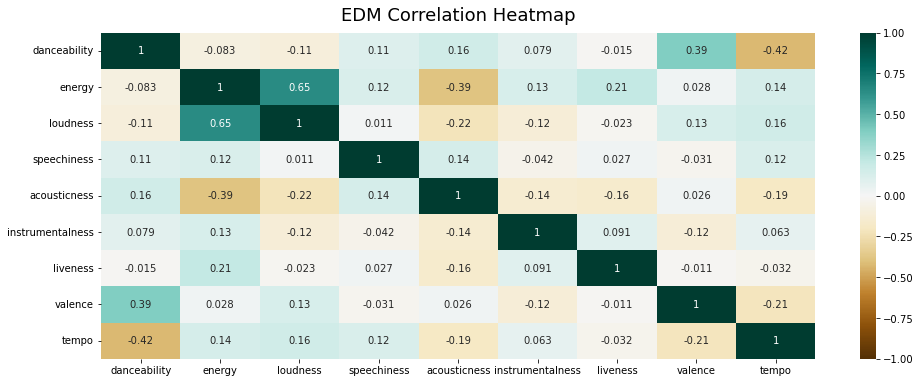

In [17]:
#dropp
df_edm_eval.drop(columns=['mode','duration_ms','key'], inplace=True)
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_edm_eval.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('EDM Correlation Heatmap', fontdict={'fontsize':18}, pad=12);